<a href="https://colab.research.google.com/github/Mohamed-derbeli/Hate_Speech_Detection_Using_Transformers/blob/main/Hate_Speech_Detection_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from scipy import stats
import pickle

import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger') 
nltk.download('omw-1.4')

# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from wordcloud import WordCloud

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
import tensorflow.keras.regularizers as regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,SpatialDropout1D

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import resample
import seaborn
import pickle

from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Dataset

In [2]:
url='https://raw.githubusercontent.com/Mohamed-derbeli/Hate_Speech_Detection_Using_Transformers/main/train_E6oV3lV.csv'

df= pd.read_csv(url)

In [3]:
pd.set_option('display.max_colwidth', None)
df.sample(30)

,id,label,tweet
22988,22989,0,just stop guns. on a watch list and still manages to purchase military assault rifle. #insanity
1416,1417,0,my first performance went great! so #imthestar
23030,23031,0,@user #wednesday #sunshine t u all s /new 'follows' + @user @user @user @user x hâ¦
5282,5283,0,into the teens now! 19 weeks to go! and hopefully not any longer! ðð¶ð» #baby #boy #countdown @user
20191,20192,0,"""bridal shower"" #bride #bridalshower #perkawinan #pengantin #girl #love #vsco #vscocamâ¦"
25222,25223,0,#thursday #tci. here's a great #tbt moment from our kiddies #bringthebeat press conference with #usain #bolt:
8226,8227,1,"#sikh #temple vandalised in in #calgary, #wso condemns act"
25077,25078,1,"what a world. if a man took a dive like that, people would say it was fixed. but b/c #rondarousey is a woman this is expected."
10639,10640,1,black women free kerala girls sex photos
23081,23082,1,@user @user tremendous oppounity to move our country back 75 years into ove #misogyny and tax breaks for corps.


In [4]:
df.index=df["id"]
df.drop('id', axis=1, inplace=True)
df.sample(5)

,label,tweet
id,,
23890,0,@user @user @user from #bbuk have same outlook on a relationship
31278,0,i keep my opinions to myself because people tend to call me names and are in general rude to me. can't speak my mind. #truth
1372,0,feelin a lil down :( #papaya #healthy #healthyeating ness #follow #hashtag #fruit
8169,0,the final season begins tonight.... #hellonwheels on one hand #stoked on the other it's the last season
8266,0,customers in @user @user @user


### Data Analysis

In [5]:
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 31962
Number of Features: 2


In [6]:
#  Check the Missing Value
df.isnull().sum()

label    0
tweet    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31962 entries, 1 to 31962
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 749.1+ KB


In [8]:
# Extracting the Target Attribute for Each Class and Visualize
hate_speech = df[df['label'] == 1].shape[0]
free_speech = df[df['label'] == 0].shape[0]
print('Hate Speech =', hate_speech)
print('Free Speech =', free_speech)

Hate Speech = 2242
Free Speech = 29720


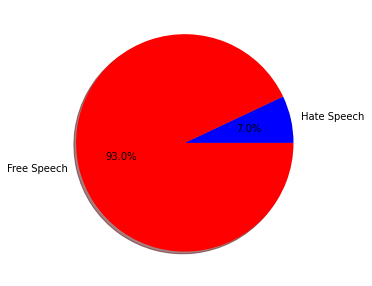

In [9]:
# Visualize the Label Class
speech = [hate_speech, free_speech]
label = ["Hate Speech", "Free Speech"]

plt.figure(figsize=(5, 5))
plt.pie(speech, labels = label, shadow = True, autopct = '%1.1f%%', colors=['blue', 'red'])
plt.style.use('fivethirtyeight')
plt.show()

Note: It is clear that our data is not balanced and this may couse a misleading in the training accuracy. 

### Add features

In [10]:
# Number of characters in the text
df['tweet_length'] = df['tweet'].apply(len)

# Number of words in the text
df['tweet_num_words'] = df['tweet'].apply(lambda x: len(x.split()))

# Average length of the words in the text
df["mean_word_len"] = df["tweet"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# Number of non-stopwords in the text: first we will extend the stopwords to include other words used in twitter
# such as retweet(rt) etc.

# nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
df['tweet_non_stopwords'] = df['tweet'].apply(lambda x: len([t for t in x.split() if t not in stopwords]))
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,31962.0,0.070146,0.255397,0.0,0.000000,0.0,0.0,1.000000
tweet_length,31962.0,84.739628,29.455749,11.0,63.000000,88.0,108.0,274.000000
tweet_num_words,31962.0,13.158720,5.478150,3.0,9.000000,13.0,17.0,34.000000
mean_word_len,31962.0,5.593463,1.945719,1.0,4.529412,5.2,6.2,81.333333
tweet_non_stopwords,31962.0,9.121144,3.474333,0.0,7.000000,9.0,11.0,27.000000


In [11]:
df.head()

,label,tweet,tweet_length,tweet_num_words,mean_word_len,tweet_non_stopwords
id,,,,,,
1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,102,18,4.555556,8
2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,122,19,5.315789,14
3,0,bihday your majesty,21,3,5.666667,2
4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,86,14,4.928571,9
5,0,factsguide: society now #motivation,39,4,8.000000,3


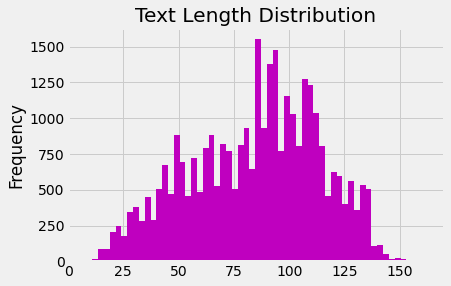

In [12]:
df["tweet_length"].plot(kind='hist', title='Text Length Distribution', xlim=[0, 170], bins = 100, figsize=(6,4),color='m')
plt.show()

**Note** : Distribution of text-length is between 5 and 150 where the most tweets-length are around 90 characters. It is also noticable that the number of tweets seem to be skewed.

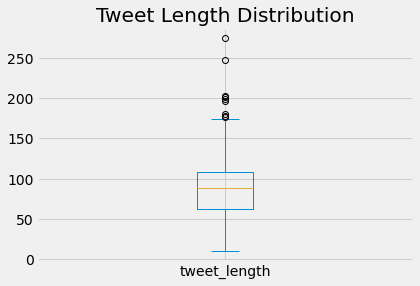

In [13]:
df["tweet_length"].plot(kind='box', title='Tweet Length Distribution', figsize=(6,4))
plt.show()

## Data Preprocessing

#### 1. Text Cleaning
- Lowercase
- Remove Punctuation
- Remove Urls
- Removing @tags
- Remove Special Characters

#### 2. Preprocessing Operations
- Tokenizing
- Removing Stop Words
- Lemmatization
- WordCloud

In [35]:
def clean_txt(tweet):
    
    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    Tweet = re.sub(regex_pat," ",tweet)
    
    #Remove @tags
    Tweet= re.sub(r'@[\w\-]+',"",Tweet)
    
    # removal of links[https://abc.com]
    url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    Tweet = re.sub(url_regex,"",Tweet)
    
    # split into words (tokenizing)
    Tweet = nltk.word_tokenize(Tweet)
    
    # convert to lower case
    Tweet = [w.lower() for w in Tweet]    
    
    # remove punctuation from each word
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    Tweet = [re_punc.sub('', w) for w in Tweet]

    # remove remaining tokens that are not alphabetic
    Tweet = [word for word in Tweet if word.isalpha()]

    # filter out stop words
    Tweet = [w for w in Tweet if w not in  stopwords] 
    
    # filter out short tokens
    Tweet = [word for word in Tweet if len(word) > 2]

    #Stemm all the words in the sentence
    lemmatizer = WordNetLemmatizer() 
    lem_words = [lemmatizer.lemmatize(word) for word in Tweet]
    combined_text = ' '.join(lem_words)
    return combined_text

# Cleaning the text data
df['cleaned_phrase'] = df['tweet'].apply(clean_txt)
df.sample(10)

,label,tweet,tweet_length,tweet_num_words,mean_word_len,tweet_non_stopwords,cleaned_phrase
id,,,,,,,
835,0,"he is my first love. i may not be his, but he makes me feel like i am. #love #cheese #shotermlongdistance",107,21,4.047619,11,first love may make feel like love cheese shotermlongdistance
24004,0,little ray of sunshine xoxo #teacupride #doobie #bestday #loveher #charlotteelizabeth,88,10,7.600000,9,little ray sunshine xoxo teacupride doobie bestday loveher charlotteelizabeth
3073,0,i am thankful for sundays. #thankful #positive,51,7,5.714286,4,thankful sunday thankful positive
28788,0,â¶ yung samu ft lokey-#eahquake produced by dj triumph #music #loveit #stripclub,84,12,5.833333,11,yung samu lokey eahquake produced triumph music loveit stripclub
15015,0,coz my ð belongs to #daddy ðµðµ #diadelpadre #fathersday #love #fun #amuse placeâ¦,93,13,6.000000,11,coz belongs daddy diadelpadre fathersday love fun amuse
8968,0,choose to be happy.. #ralphharston #quotes #weekendinspiration #happiness #thinkbigsundaywithmarsha,102,9,10.111111,7,choose happy ralphharston quote weekendinspiration happiness thinkbigsundaywithmarsha
5481,0,@user when i see a baby smile,31,7,3.285714,4,see baby smile
766,0,monday mornings working by the lake #scottieandrussell #work #love #picofthedayâ¦,85,10,7.300000,8,monday morning working lake scottieandrussell work love
16032,0,happy bihday blue card bihday #blue #handmade #creativity,61,8,6.250000,8,happy bihday blue card bihday blue handmade creativity


In [15]:
# label_list = df.label.values.tolist()
cleaned_phrase_list = df.cleaned_phrase.values.tolist()
# print(cleaned_phrase_list)
# print(label_list)

In [58]:
# def to_array(text):
#     array = np.array(text)
#     return array

Y = df.label.to_numpy()
Y

array([0, 0, 0, ..., 0, 1, 0])

In [66]:
#tokenization
max_words = 10000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(cleaned_phrase_list)
sequences = tok.texts_to_sequences(cleaned_phrase_list)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)
sequences_matrix

array([[   0,    0,    0, ...,  116, 6570,  306],
       [   0,    0,    0, ..., 3630, 6572, 8402],
       [   0,    0,    0, ...,    0,   17, 2812],
       ...,
       [   0,    0,    0, ..., 6355,   24,   59],
       [   0,    0,    0, ..., 1330, 1331,  421],
       [   0,    0,    0, ...,    0,   90,   99]], dtype=int32)

# LSTM

In [67]:
# from tensorflow.keras.initializers import Constant
# from tensorflow.keras.optimizers import Adam


embedding_mat_col=512

# model = Sequential()
# model.add(Embedding(input_dim=max_words, output_dim=embedding_mat_col, input_length=max_len))
# model.add(SpatialDropout1D(0.4))
# model.add(LSTM(50, dropout=0.4, recurrent_dropout=0.4,input_shape=(None, 512)))
# model.add(Dense(1,activation='softmax'))

# dropout=0.4, recurrent_dropout=0.4, 

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=embedding_mat_col, input_length=max_len),
    tf.keras.layers.LSTM(20, input_shape=(None, 512)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 150, 512)          5120000   
                                                                 
 lstm_7 (LSTM)               (None, 20)                42640     
                                                                 
 batch_normalization_7 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 dense_21 (Dense)            (None, 8)                 168       
                                                                 
 dense_22 (Dense)            (None, 4)                 36        
                                                                 
 dense_23 (Dense)            (None, 1)                 5         
                                                      

In [68]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(df['cleaned_phrase'] )
tfidf

X = tfidf
Y = df["label"].astype(int)

print(X.shape,Y.shape)

# X=sequences_matrix

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 1, shuffle=True)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(31962, 7945) (31962,)
(28765, 7945) (28765,)
(3197, 7945) (3197,)


In [62]:
batch_size =32
model.fit(X_train, Y_train, epochs = 1, batch_size=batch_size,verbose = 1)

pickle.dump(model, open('/content/drive/MyDrive/Colab Notebooks/model_LSTM.pkl','wb'))

model = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/model_LSTM.pkl','rb'))

899/899 [==============================] - 1354s 2s/step - loss: 0.1790 - accuracy: 0.9421


In [63]:
prediction=model.predict(X_test)

100/100 [==============================] - 30s 296ms/step


In [65]:
Hate_Free=[]
predictions=[]
for itm in prediction:
  predictions.append(itm)
  # if int(itm)==0:
  #     Hate_Free.append("Hate_Speech")
  # else:
  #     Hate_Free.append("Free_Speech")

results = pd.DataFrame({'label':Y_test,'prediction':predictions})
results["prediction"]=results["prediction"].astype(int)

# print(results.sample(10))
# results.info()
        
  #  astype(str).     
print('Test Accuracy: ', accuracy_score(results.label, results.prediction) * 100, '\n')
print('Confusion Matrix : \n',confusion_matrix(results.label, results.prediction), '\n')
print('Classification Report : \n ',classification_report(results.label, results.prediction), '\n')

Test Accuracy:  92.71191742258367 

Confusion Matrix : 
 [[2964    0]
 [ 233    0]] 

Classification Report : 
                precision    recall  f1-score   support

           0       0.93      1.00      0.96      2964
           1       0.00      0.00      0.00       233

    accuracy                           0.93      3197
   macro avg       0.46      0.50      0.48      3197
weighted avg       0.86      0.93      0.89      3197
 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Note: As we mentioned earlier, the Imbalanced data may cause misleading in the training accuracy. This was proven by the above results since the precision in the classification report is high with 0 and null with 1.

# Balance the dataset

### Over Sampling

In [23]:
def oversample(dataset):
  """Oversample minoriity class because of the imbalance"""
  # Separate majority and minority classes in data for oversampling
  majority = dataset[dataset['label'] == 0]
  minority = dataset[dataset['label'] == 1]

  print("majority class before oversample: ", majority.shape)
  print("minority class before oversample: ", minority.shape)

  # Upsample minority class
  minority_oversampled = resample(minority, 
                                 replace=True,      # sample with replacement
                                 n_samples= majority.shape[0],  # to match majority class
                                 random_state=123)  # reproducible results
 
  # Combine majority class with oversampled minority class
  oversampled = pd.concat([majority, minority_oversampled])
  # shuffling the data
  oversampled = oversampled.sample(frac=1).reset_index(drop=True)
  # Display new class counts
  print("After oversampling\n", oversampled.label.value_counts(), sep = "")
  return oversampled

In [24]:
X=df['cleaned_phrase'].values
Y=df['label'].values
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, stratify=Y,test_size = 0.01, random_state = 1, shuffle=True)

train_over = oversample(pd.DataFrame({"tweet": X, "label": Y}))
train_over.head()

majority class before oversample:  (29720, 2)
minority class before oversample:  (2242, 2)
After oversampling
0    29720
1    29720
Name: label, dtype: int64


,tweet,label
0,hour away first trivia night navyyard,0
1,would promote hitting woman condoning assault amp terrorism war,1
2,miami west teacher late class supposed sta min ago one seems care,0
3,fave kind jungkook jungkookday vine,0
4,really many gon drop seriously wtfw oitnb oitnbchat bingewatching,0


In [25]:
X = train_over["tweet"]
Y = train_over["label"].to_numpy()

max_words = 10000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
X = pad_sequences(sequences,maxlen=max_len)

# LSTM for balanced dataset

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 1, shuffle=True)



embedding_mat_col=512


model1 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=embedding_mat_col, input_length=max_len),
    tf.keras.layers.LSTM(40, input_shape=(None, 512)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

model1.fit(X_train, Y_train, epochs = 4, batch_size=batch_size,verbose = 1)

pickle.dump(model1, open('/content/drive/MyDrive/Colab Notebooks/model_LSTM.pkl','wb'))
model1 = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/model_LSTM.pkl','rb'))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 512)          5120000   
                                                                 
 lstm_1 (LSTM)               (None, 40)                88480     
                                                                 
 batch_normalization_1 (Batc  (None, 40)               160       
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 8)                 328       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                      

In [27]:
prediction=model1.predict(X_test)

186/186 [==============================] - 9s 46ms/step


In [28]:
Hate_Free=[]
predictions=[]
for itm in prediction:
  predictions.append(itm)

results = pd.DataFrame({'label':Y_test,'prediction':predictions})
results["prediction"]=results["prediction"].astype(int)

print('Test Accuracy: ', accuracy_score(results.label, results.prediction) * 100, '\n')
print('Confusion Matrix : \n',confusion_matrix(results.label, results.prediction), '\n')
print('Classification Report : \n ',classification_report(results.label, results.prediction), '\n')

Test Accuracy:  50.42059219380888 

Confusion Matrix : 
 [[2949    0]
 [2947   48]] 

Classification Report : 
                precision    recall  f1-score   support

           0       0.50      1.00      0.67      2949
           1       1.00      0.02      0.03      2995

    accuracy                           0.50      5944
   macro avg       0.75      0.51      0.35      5944
weighted avg       0.75      0.50      0.35      5944
 



In [29]:
# print(results.sample(10))

In [34]:
# X = train_over["tweet"]
# Y = train_over["label"].to_numpy()
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_df=0.75, min_df=5, max_features=10000)

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(train_over["tweet"] )
tfidf

X = tfidf
y = train_over["label"].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model2 = LogisticRegression().fit(X_train_tfidf,y_train)
y_preds = model2.predict(X_test_tfidf)
report = classification_report( y_test, y_preds )
print(report)
acc=accuracy_score(y_test,y_preds)
print("Logistic Regression, Accuracy Score:" , acc)




predictions=[]
for itm in y_preds:
  predictions.append(itm)

results = pd.DataFrame({'label':y_test,'prediction':predictions})
# results["prediction"]=results["prediction"].astype(int)

print(results.sample(10))



              precision    recall  f1-score   support

           0       0.98      0.95      0.96      5954
           1       0.95      0.98      0.97      5934

    accuracy                           0.96     11888
   macro avg       0.97      0.96      0.96     11888
weighted avg       0.97      0.96      0.96     11888

Logistic Regression, Accuracy Score: 0.964586137281292
       label  prediction
57421      0           0
9249       1           1
36066      0           0
56704      1           1
47405      0           0
42019      0           1
11902      0           0
50596      0           0
11762      1           1
36514      0           0


### Visualizations

Visualizing which of the word is most commonly used in the twitter dataset

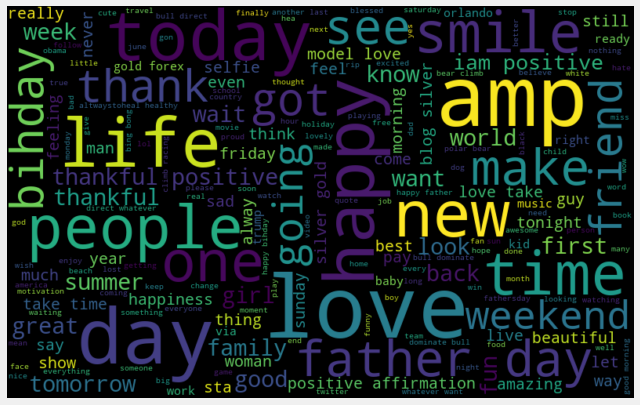

In [30]:
# imshow-Display data as an image
# interpolation - https://matplotlib.org/3.2.1/gallery/images_contours_and_fields/interpolation_methods.html
all_words = ' '.join([text for text in df['cleaned_phrase'] ])

wordcloud = WordCloud(width=800, 
                      height=500, 
                      random_state=21, 
                      max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Visualizing which of the word is most commonly used for hate speech

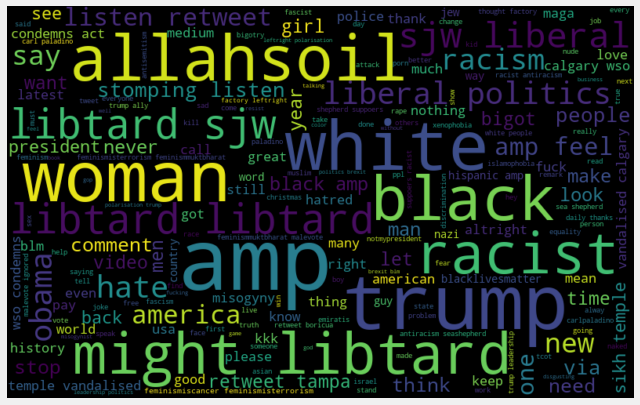

In [31]:
hate_words = ' '.join([text for text in df['cleaned_phrase'][df['label'] == 1]])
wordcloud = WordCloud(width=800, 
                      height=500,
                      random_state=21, 
                      max_font_size=110).generate(hate_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Visualizing which of the word is most commonly used for free speech

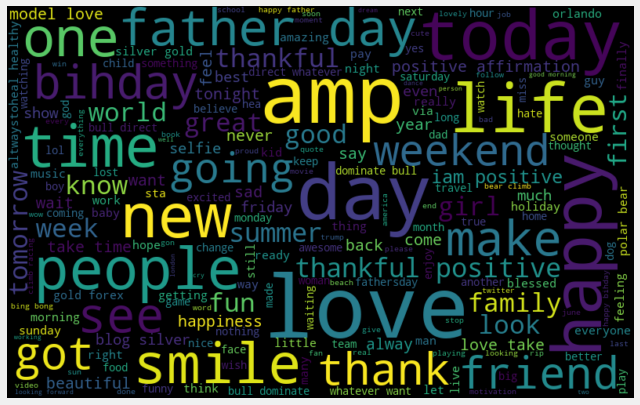

In [32]:
free_words = ' '.join([text for text in df['cleaned_phrase'][df['label'] == 0]])
wordcloud = WordCloud(width=800, 
                      height=500,
                      random_state=21, 
                      max_font_size=110).generate(free_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()